  Zone gÃ©ographique  PÃ©riode BlÃ© Tendre    BlÃ© Dur       Orge       MaÃ¯s  \
0           National      2014     3705710     1410180    1638090       98190   
1           National      2015     5667710     2406950    3396990       95800   
2           National      2016     1856140      874990     619920      128800   
3           National      2017     4891741     2199076    2466462  122398.733   
4           National      2018  4910112.86  2431979.25  2919462.1      118380   
5           National      2019     2681650     1343650    1161180       40490   
6           National      2020     1769980    791917.5   645032.3       29890   

         Total  
0      6931480  
1     11691020  
2      3551290  
3  9777667.733  
4  10467714.21  
5      5303650  
6    3246559.8  
Index(['zonegeographique', 'période', 'BLÉ TENDRE', 'BLÉ DUR', 'ORGE', 'MAÏS',
       'TOTAL'],
      dtype='object')


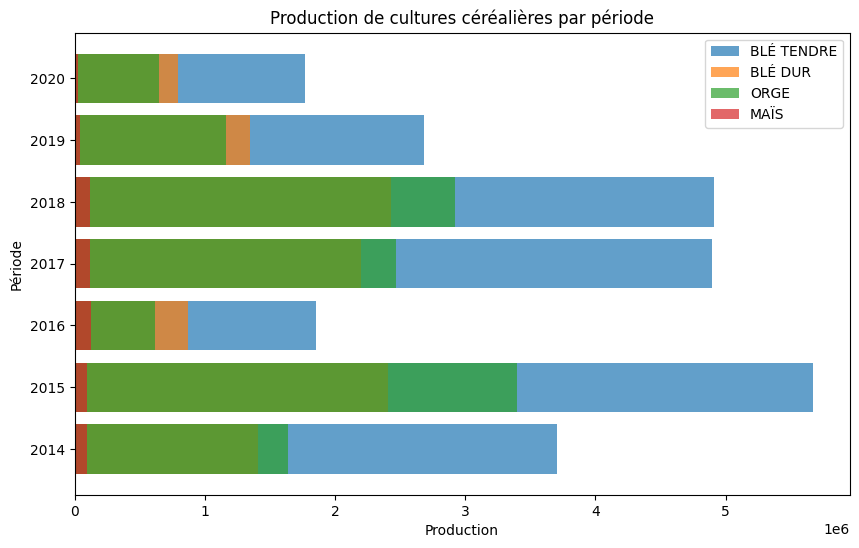

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.read_csv("/content/drive/MyDrive/productioncealaeareglobal.csv", sep=",", encoding="ISO-8859-1")

dataframe = dataframe.iloc[:-1]

print(dataframe)
dataframe.columns = ['zonegeographique', 'période','BLÉ TENDRE', 'BLÉ DUR',	'ORGE',	'MAÏS',	'TOTAL']
print(dataframe.columns)

# dataframe['productioncealaeare'] = pd.to_numeric(dataframe['productioncealaeare'], errors='coerce')

y = dataframe.période
x = dataframe.TOTAL
# plt.plot(dataframe['période'], dataframe["productioncealaeare"], marker='o', linestyle='--', color='red')
# plt.xlabel('Période')
# plt.ylabel('Production')
# plt.title('Production céalaéare en fonction de la période')
# plt.grid(True)
# plt.show()


# plt.figure(figsize=(10, 6))
# for crop in ['BLÉ TENDRE', 'BLÉ DUR',	'ORGE',	'MAÏS']:
#     plt.hist(dataframe['période'], weights=dataframe[crop], bins=10, alpha=0.7, label=crop)

# plt.xlabel('Production')
# plt.ylabel('Fréquence')
# plt.title('Histogramme de la production des cultures')
# plt.legend()
# plt.grid(True)
# plt.show()
plt.figure(figsize=(10, 6))
for crop in ['BLÉ TENDRE', 'BLÉ DUR', 'ORGE', 'MAÏS']:
    plt.barh(dataframe['période'], dataframe[crop].astype(float), alpha=0.7, label=crop)

plt.ylabel('Période')
plt.xlabel('Production')
plt.title('Production de cultures céréalières par période')
plt.legend()
plt.show()




   Unnamed: 0 Unnamed: 1 Unnamed: 2  Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0         NaN        NaN        NaN         NaN        NaN        NaN   
1         NaN        NaN        NaN         NaN        NaN        NaN   
2         NaN        NaN        NaN         NaN        NaN        NaN   
3         NaN        NaN        NaN         NaN        NaN        NaN   
4         NaN        NaN        NaN         NaN        NaN        NaN   
5         NaN        NaN        NaN         NaN        NaN        NaN   
6         NaN        NaN        NaN         NaN        NaN        NaN   
7         NaN        NaN        NaN         NaN        NaN        NaN   
8         NaN        NaN        NaN         NaN        NaN        NaN   
9         NaN        NaN        NaN         NaN        NaN        NaN   
10        NaN        NaN        NaN         NaN        NaN        NaN   
11        NaN        NaN        NaN         NaN        NaN        NaN   
12        NaN        NaN        NaN         NaN    

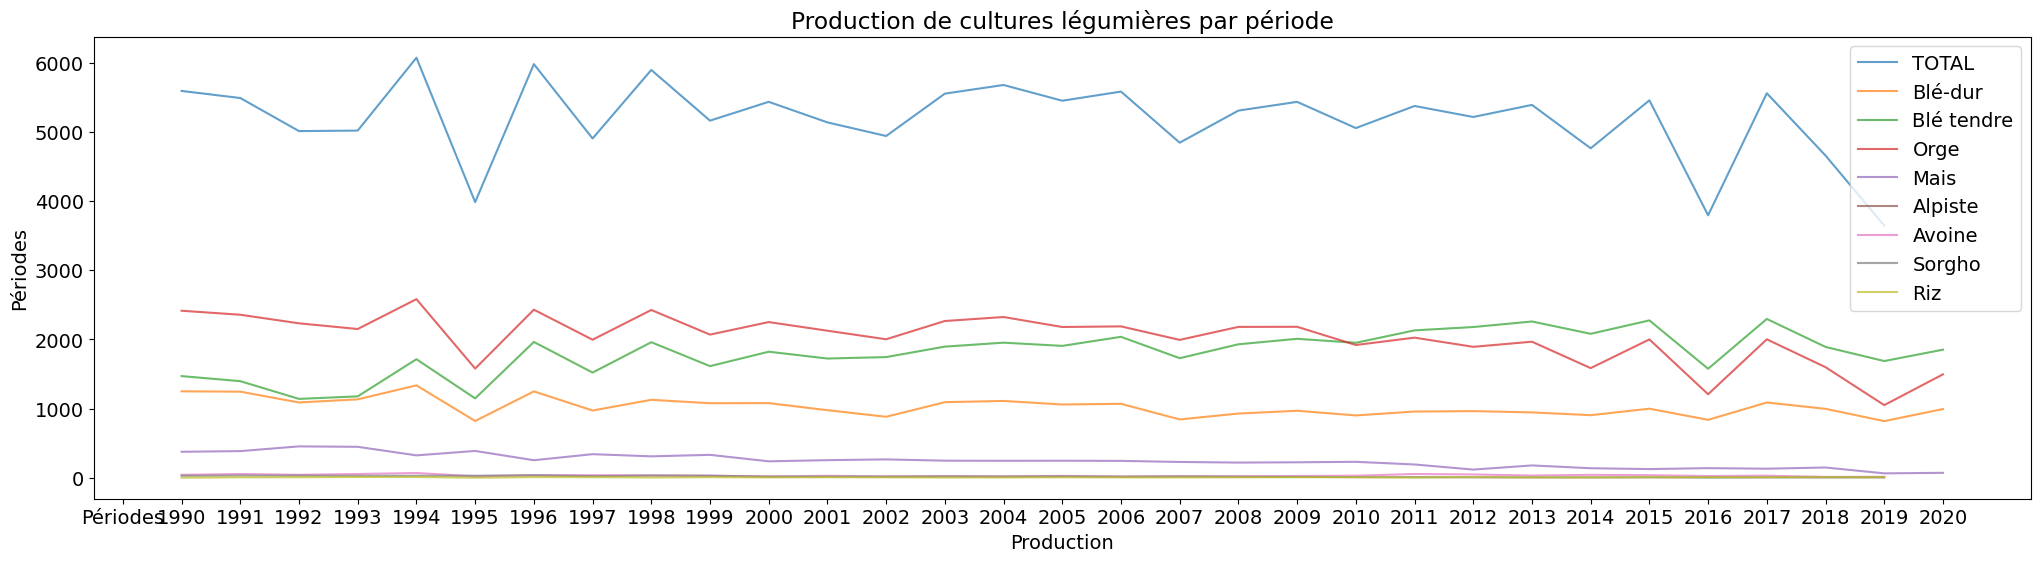

In [13]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import numpy as np
import plotly.graph_objs as go
import plotly.express as px


dataframe=pd.read_csv("/content/drive/MyDrive/1990curealcultive.csv" , sep=";" , encoding="ISO-8859-1")
print(dataframe)



# dataframe = dataframe.iloc[:-1]
print(dataframe)
dataframe.columns = ['Périodes', 'TOTAL' ,'Blé-dur'	,'Blé tendre', 	'Orge' , 	'Mais' ,	'Alpiste' , 	'Avoine' , 	'Sorgho',	'Riz']

# dataframe_cultures = dataframe[['PÉRIODE' , 	'FÈVE' , 	'PETIT POIS',	'LENTILLE	POIS'   , 'CHICHE']]
# dataframe_cultures.set_index('PÉRIODE', inplace=True)

# # Tracer les données
# plt.figure(figsize=(10, 6))

# for crop in dataframe_cultures.columns:
#     plt.plot(dataframe_cultures.index, dataframe_cultures[crop], marker='o', label=crop)

# plt.xlabel('Année')
# plt.ylabel('Production')
# plt.title('Production de différentes cultures par année')
# plt.legend()
# plt.grid(True)
# plt.show()

# Conversion des colonnes en numérique
# cols_to_convert = ['FÈVE' , 	'PETIT POIS',	'LENTILLE	POIS'   , 'CHICHE']
# dataframe[cols_to_convert] = dataframe[cols_to_convert].apply(pd.to_numeric, errors='coerce')


# # Créer un DataFrame avec les données de chaque culture uniquement
# dataframe_cultures = dataframe[['PÉRIODE' , 	'FÈVE' , 	'PETIT POIS',	'LENTILLE	POIS'   , 'CHICHE']]
# dataframe_cultures.set_index('PÉRIODE', inplace=True)
# # Ajouter une colonne pour le total de chaque année
# # dataframe_cultures['Total'] = dataframe_cultures.sum(axis=1)
# # Tracer les données
# dataframe['TOTAL']=dataframe['TOTAL'].apply(pd.to_numeric, errors='coerce')
# plt.figure(figsize=(10, 6))

# for crop in dataframe_cultures.columns:
#     plt.plot(dataframe_cultures.index, dataframe_cultures[crop], marker='o', label=crop)

# plt.plot(dataframe_cultures.index, dataframe['TOTAL'], color='black', marker='o', label='Total')
# plt.xlabel('Année')
# plt.ylabel('Production')
# plt.title('Production de différentes cultures légumieres par année')
# plt.legend()
# plt.grid(True)
# plt.show()

custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']


non_numeric_values = [ 'TOTAL' ,'Blé-dur'	,'Blé tendre', 	'Orge' , 	'Mais' ,	'Alpiste' , 	'Avoine' , 	'Sorgho',	'Riz']

for crop in non_numeric_values:
    dataframe[crop] = dataframe[crop].str.replace(',', '.')
    dataframe[crop] = pd.to_numeric(dataframe[crop], errors='coerce')

dataframe['Périodes'] = dataframe['Périodes'].astype(str)  # Conversion en chaînes de caractères

plt.figure(figsize=(25, 6))
for idx, crop in enumerate(non_numeric_values):
    plt.plot(dataframe['Périodes'], dataframe[crop], alpha=0.7, label=crop, color=custom_colors[idx])

plt.ylabel('Périodes')
plt.xlabel('Production')
plt.title('Production de cultures légumières par période')
plt.legend()
plt.show()
table = go.Figure(data=[go.Table(
    header=dict(values=list(dataframe.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[dataframe[col] for col in dataframe.columns],
               fill_color='lavender',
               align='left'))
])

table.show()

  Zone gÃ©ographique  PÃ©riode BlÃ© Tendre BlÃ© Dur     Orge   MaÃ¯s    Total
0           National      2014     2081400   904800  1585200  138100  4764000
1           National      2015     2275300   998500  2000200  126600  5457400
2           National      2016     1575800   837800  1207600  138800  3795400
3           National      2017     2296420  1087805  2001473  130742  5559740
4           National      2018     1891460   996638  1598680  148178  4659031
5           National      2019     1687300   818700  1050200   63300  3645200
6           National      2020     1852000   993300  1495200   71100  4431100
7           National      2021         â¦      â¦      â¦     â¦      â¦
  Zone gÃ©ographique  PÃ©riode BlÃ© Tendre BlÃ© Dur     Orge   MaÃ¯s    Total
0           National      2014     2081400   904800  1585200  138100  4764000
1           National      2015     2275300   998500  2000200  126600  5457400
2           National      2016     1575800   837800  1207600  13

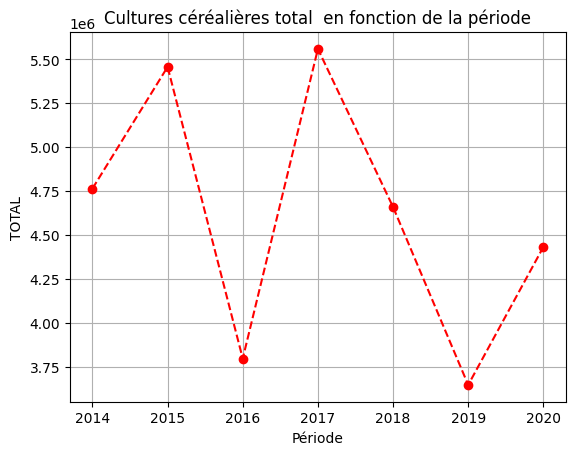

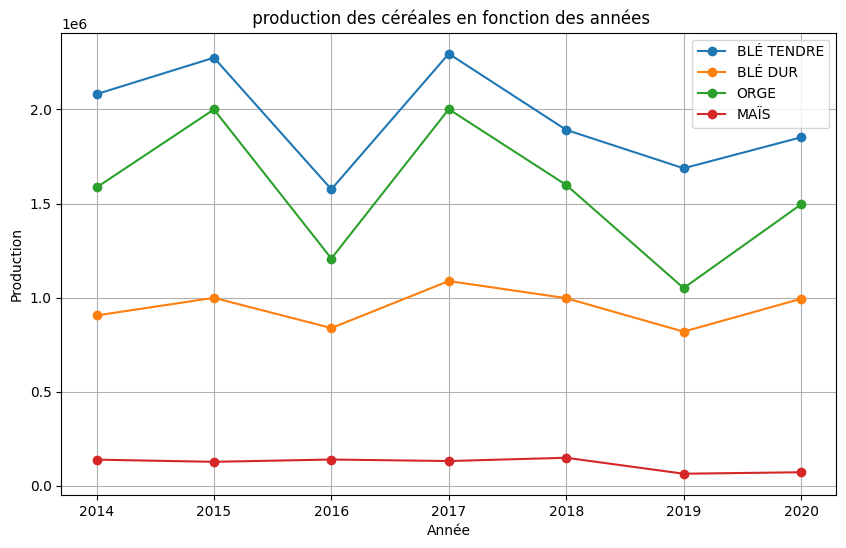

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import numpy as np



dataframe=pd.read_csv("/content/drive/MyDrive/culceral.csv" , sep="," , encoding="ISO-8859-1")
print(dataframe)


dataframe = dataframe.iloc[:-1]

print(dataframe)
dataframe.columns = ['zonegeographique', 'période','BLÉ TENDRE', 'BLÉ DUR',	'ORGE',	'MAÏS',	'TOTAL']
print(dataframe.columns)
column_type = dataframe['TOTAL'].dtype
print(column_type)
dataframe['TOTAL'] = dataframe['TOTAL'].astype(float)

y=dataframe.TOTAL
x=dataframe.période
plt.plot(dataframe['période'], dataframe["TOTAL"],
marker='o', linestyle='--', color='red')
plt.xlabel('Période')
plt.ylabel('TOTAL')
plt.title('Cultures céréalières total  en fonction de la période')
plt.grid(True)
# plt.scatter(x,y)
# ax = plt.gca()
# ax.yaxis.set_major_locator(MultipleLocator(10000))
plt.show()



# Convertir les colonnes numériques en nombres
cols_to_convert = ['BLÉ TENDRE', 'BLÉ DUR',	'ORGE',	'MAÏS']
dataframe[cols_to_convert] = dataframe[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Filtrer les données de l'année 2021 qui semblent être des valeurs manquantes
dataframe = dataframe[dataframe['période'] != 2021]

# Tracer les données
plt.figure(figsize=(10, 6))
for crop in ['BLÉ TENDRE', 'BLÉ DUR',	'ORGE',	'MAÏS']:
    plt.plot(dataframe['période'], dataframe[crop], marker='o', label=crop)

plt.xlabel('Année')
plt.ylabel('Production')
plt.title(' production des céréales en fonction des années')
plt.legend()
plt.grid(True)
plt.show()


   Unnamed: 0                 Unnamed: 1
0         NaN                        NaN
1    Périodes  Superficie agricole utile
2        1990                     8889,2
3        1991                     8944,1
4        1992                     9195,3
5        1993                     9255,5
6        1994                     9291,2
7        1995                     9290,7
8        1996                     9292,3
9        1997                       9278
10       1998                     9238,3
11       1999                     9142,4
12       2000                     9081,4
13       2001                     9023,7
14       2002                     8979,7
15       2003                     8975,2
16       2004                       9041
17       2005                     8988.3
18       2006                     8946.6
19       2007                     8959.8
20       2008                     8980.6
21       2009                     9002.6
22       2010                     8988.3
23       2011   

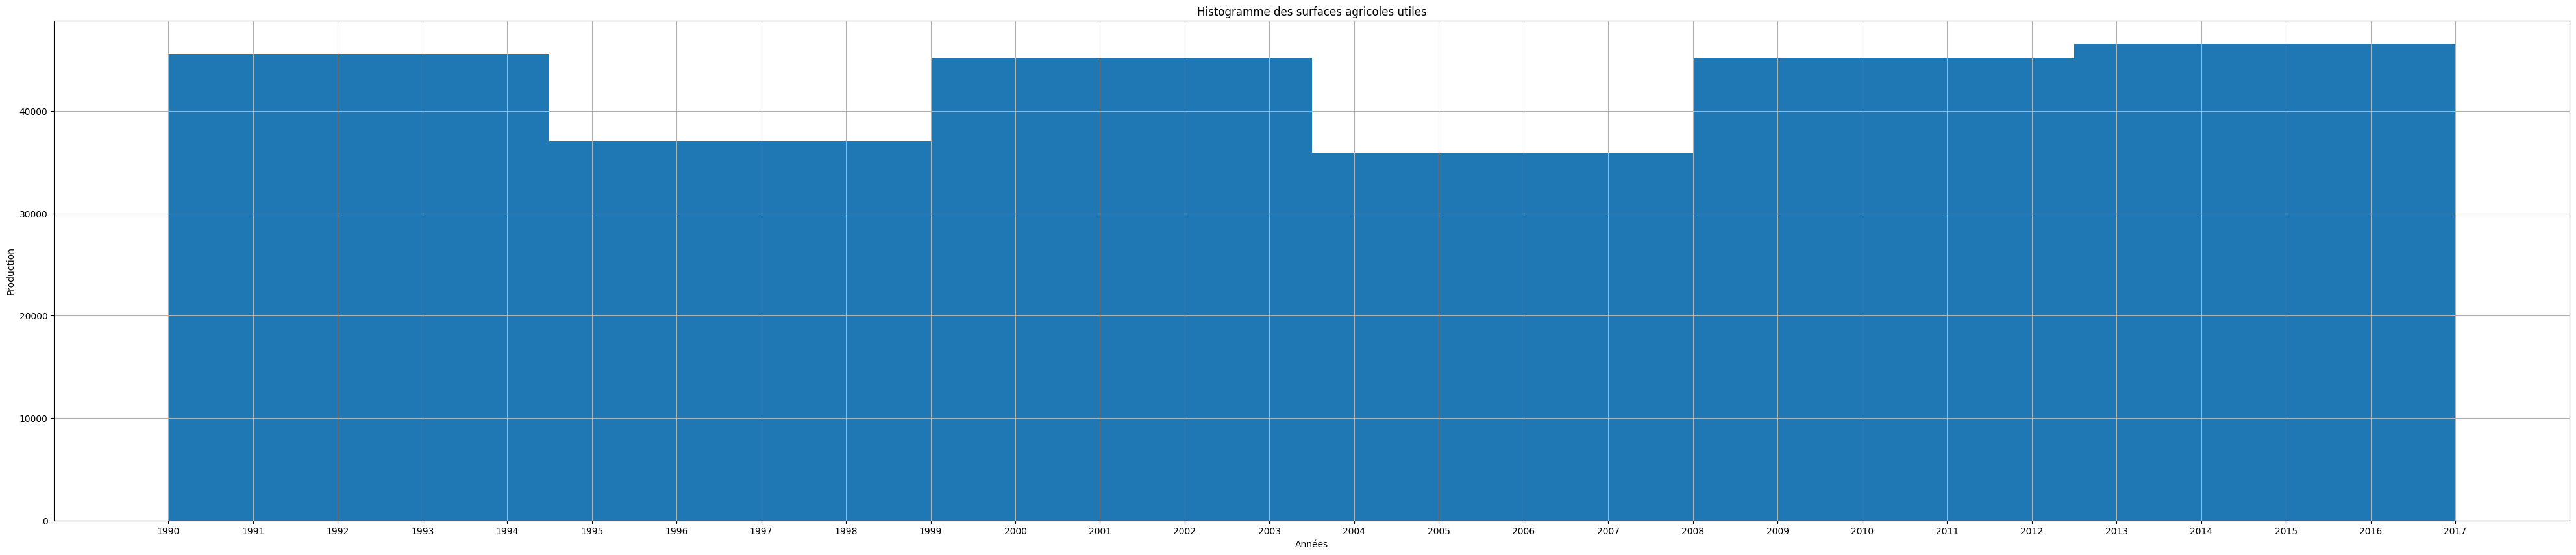

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import numpy as np
import plotly.graph_objs as go
import plotly.express as px


dataframe=pd.read_csv("/content/drive/MyDrive/agricoleutillnational.csv" , sep=";" , encoding="ISO-8859-1")
print(dataframe)

# Supprimer les deux premières lignes
dataframe = dataframe.iloc[2:]

# Réinitialiser les index
dataframe.reset_index(drop=True, inplace=True)
print(dataframe)
dataframe.columns = [ 'PÉRIODE',	'SUPERFICIE AGRICOLE UTILE']

dataframe['PÉRIODE'] = dataframe['PÉRIODE'].astype(str)
dataframe['SUPERFICIE AGRICOLE UTILE'] = dataframe['SUPERFICIE AGRICOLE UTILE'].str.replace(',', '.')
dataframe['SUPERFICIE AGRICOLE UTILE'] = pd.to_numeric(dataframe['SUPERFICIE AGRICOLE UTILE'], errors='coerce')

plt.figure(figsize=(50, 10))
plt.hist(dataframe['PÉRIODE'], weights=dataframe['SUPERFICIE AGRICOLE UTILE'], bins=6, alpha=1)
plt.xlabel('Années')
plt.ylabel('Production')
plt.title('Histogramme des surfaces agricoles utiles')
plt.grid(True)
plt.show()
table = go.Figure(data=[go.Table(
    header=dict(values=list(dataframe.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[dataframe[col] for col in dataframe.columns],
               fill_color='lavender',
               align='left'))
])

table.show()

   Indicateur : Superficie cultivée des légumineuses Unnamed: 2    Unnamed: 3  \
0           NaN                                  NaN        NaN           NaN   
1      Périodes                                Total       Fève  Petits-poids   
2           NaN                                  NaN        NaN           NaN   
3          1990                                502,4      224,4          69,6   
4          1991                                445,1      178,5            62   
5          1992                                  450      216,8          41,4   
6          1993                                322,3       99,5          37,8   
7          1994                                346,8      122,6          41,9   
8          1995                                316,1        118          27,9   
9          1996                                312,3      135,1            30   
10         1997                                362,4      153,2          37,5   
11         1998             

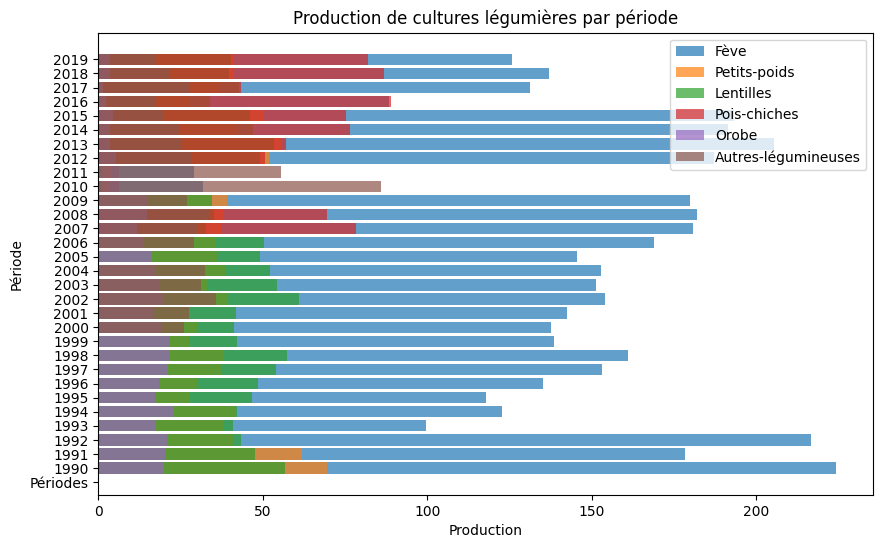

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataframe = pd.read_csv("/content/drive/MyDrive/lugumdataAnncsv.csv", sep=";", encoding="ISO-8859-1")



print(dataframe)
print(dataframe.columns)
dataframe.columns = [ 'Périodes' ,	'Total',	'Fève',	'Petits-poids' ,	'Lentilles'	 ,'Pois-chiches' ,	'Orobe' ,	'Autres-légumineuses']
print(dataframe.columns)

# dataframe['productioncealaeare'] = pd.to_numeric(dataframe['productioncealaeare'], errors='coerce')

y = dataframe.Périodes
x = dataframe.Total
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

non_numeric_values = ['Fève', 'Petits-poids', 'Lentilles', 'Pois-chiches', 'Orobe', 'Autres-légumineuses']

for crop in non_numeric_values:
    dataframe[crop] = dataframe[crop].str.replace(',', '.')
    dataframe[crop] = pd.to_numeric(dataframe[crop], errors='coerce')

dataframe['Périodes'] = dataframe['Périodes'].astype(str)  # Conversion en chaînes de caractères

plt.figure(figsize=(10, 6))
for idx, crop in enumerate(non_numeric_values):
    plt.barh(dataframe['Périodes'], dataframe[crop], alpha=0.7, label=crop, color=custom_colors[idx])

plt.ylabel('Période')
plt.xlabel('Production')
plt.title('Production de cultures légumières par période')
plt.legend()
plt.show()



           Zone gÃ©ographique  PÃ©riode  BlÃ© Tendre  BlÃ© Dur       Orge  \
0  Tanger-TÃ©touan-Al Hoceima      2014       130681     80615  116566.00   
1  Tanger-TÃ©touan-Al Hoceima      2015       152938    106161  127704.00   
2  Tanger-TÃ©touan-Al Hoceima      2016       125357     86229   94317.00   
3  Tanger-TÃ©touan-Al Hoceima      2017       137110     93990  124380.00   
4  Tanger-TÃ©touan-Al Hoceima      2018       140990    107440  120465.00   
5  Tanger-TÃ©touan-Al Hoceima      2019       144624    108468   95271.75   
6  Tanger-TÃ©touan-Al Hoceima      2020       119450    111590   98000.00   
7  Tanger-TÃ©touan-Al Hoceima      2021       120700    106900   99000.00   

    MaÃ¯s  Autres cÃ©rÃ©ales      Total  
0  3561.0               1540  332963.00  
1  3825.0               1600  392228.00  
2  2930.0               1676  310509.00  
3  2635.0               1676  359791.00  
4  1765.0               1329  371989.00  
5  1514.0               6042  355919.75  
6  2010.0   

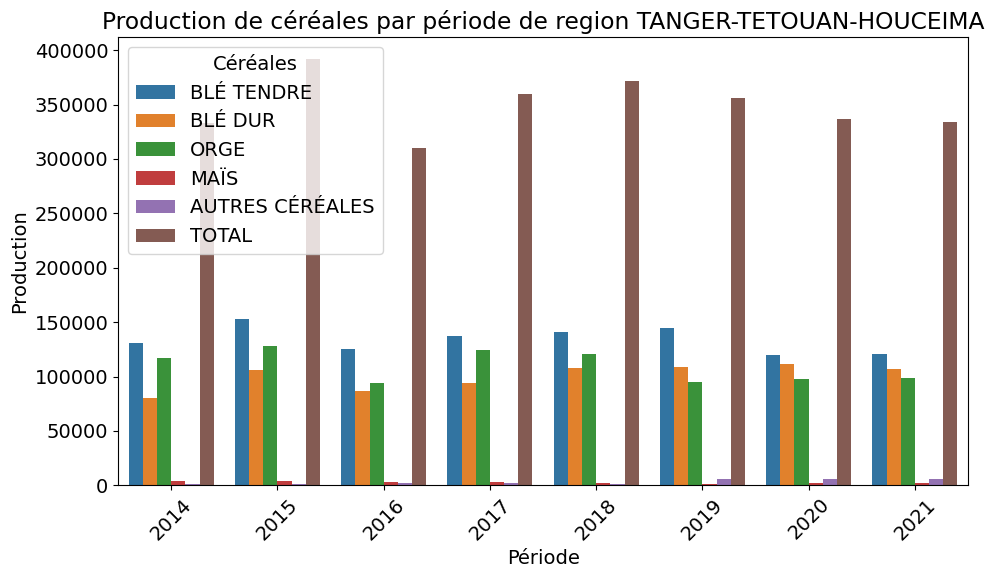

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
dataframe = pd.read_csv("/content/drive/MyDrive/regionalpython/indicateur_I250.csv", sep=",", encoding="ISO-8859-1")



print(dataframe)
print(dataframe.columns)
dataframe.columns = [ 'ZONEGÉOGRAPHIQUE'	,'PÉRIODE'	,'BLÉ TENDRE' ,	'BLÉ DUR' ,	'ORGE'	,'MAÏS','AUTRES CÉRÉALES',	'TOTAL']
columns_to_plot = ['PÉRIODE', 'BLÉ TENDRE', 'BLÉ DUR', 'ORGE', 'MAÏS', 'AUTRES CÉRÉALES',	'TOTAL']

# Utiliser la fonction melt pour regrouper les colonnes
melted_data = dataframe.melt(id_vars='PÉRIODE', value_vars=columns_to_plot, var_name='Céréales', value_name='Production')

# Créer le diagramme à barres
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_data, x='PÉRIODE', y='Production', hue='Céréales')
plt.title('Production de céréales par période de region TANGER-TETOUAN-HOUCEIMA')
plt.xlabel('Période')
plt.ylabel('Production')
plt.xticks(rotation=45)
plt.legend(title='Céréales')
plt.tight_layout()
plt.show()
table = go.Figure(data=[go.Table(
    header=dict(values=list(dataframe.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[dataframe[col] for col in dataframe.columns],
               fill_color='lavender',
               align='left'))
])

table.show()

  Zone gÃ©ographique  PÃ©riode  BlÃ© Tendre  BlÃ© Dur       Orge  MaÃ¯s  \
0       FÃ¨s-MeknÃ¨s      2015      399.100   236.800  198.90000  0.867   
1       FÃ¨s-MeknÃ¨s      2016      343.700   170.600  138.60000    1.5   
2       FÃ¨s-MeknÃ¨s      2017      363.980   234.260  217.29000   0.92   
3       FÃ¨s-MeknÃ¨s      2018      334.510   208.830  219.75000      -   
4       FÃ¨s-MeknÃ¨s      2019      381.512   138.844  233.47525   0.55   
5       FÃ¨s-MeknÃ¨s      2020      334.540   181.060  184.90000   0.32   

       Total  
0  839.50000  
1  657.60000  
2  820.66200  
3  763.09000  
4  754.93225  
5  700.82000  
Index(['Zone gÃ©ographique', 'PÃ©riode', 'BlÃ© Tendre', 'BlÃ© Dur', 'Orge',
       'MaÃ¯s', 'Total'],
      dtype='object')


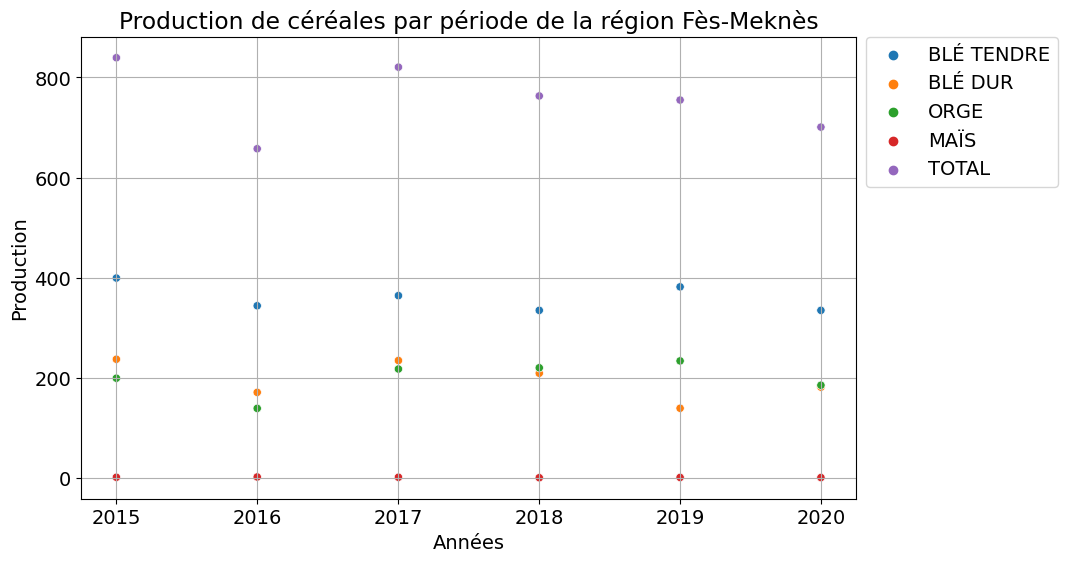

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataframe = pd.read_csv("/content/drive/MyDrive/regionalpython/indicateurfes.csv", sep=",", encoding="ISO-8859-1")



print(dataframe)
print(dataframe.columns)
dataframe.columns = [ 'ZONEGÉOGRAPHIQUE'	,'PÉRIODE'	,'BLÉ TENDRE' ,	'BLÉ DUR' ,	'ORGE'	,'MAÏS',	'TOTAL']
dataframe['MAÏS'] = pd.to_numeric(dataframe['MAÏS'], errors='coerce').fillna(0)
columns_to_plot = ['PÉRIODE', 'BLÉ TENDRE', 'BLÉ DUR', 'ORGE', 'MAÏS', 	'TOTAL']
# Convertir 'PÉRIODE' en datetime si ce n'est pas déjà le cas
dataframe['PÉRIODE'] = pd.to_datetime(dataframe['PÉRIODE'], format='%Y')

# Définir 'PÉRIODE' comme index
dataframe.set_index('PÉRIODE', inplace=True)

# Utiliser la fonction melt pour regrouper les colonnes
melted_data = dataframe.reset_index().melt(id_vars='PÉRIODE', value_vars=columns_to_plot, var_name='Céréales', value_name='Production')

# Créer le diagramme à dispersion avec les années en abscisse
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
sns.scatterplot(data=melted_data, x='PÉRIODE', y='Production', hue='Céréales')
plt.ylabel("Production")
plt.xlabel('Années')
plt.grid()
plt.legend(bbox_to_anchor=(1, 1.02))
plt.title("Production de céréales par période de la région Fès-Meknès")
plt.show()


  Zone gÃ©ographique  PÃ©riode  BlÃ© Tendre  BlÃ© Dur    Orge  MaÃ¯s  \
0  Casablanca-Settat      2016       383400    230200  284200  56706   
1  Casablanca-Settat      2018       315700    178300  189300  37200   

   Autres cÃ©rÃ©ales   Total  
0              16200  970706  
1               9600  730100  
Index(['Zone gÃ©ographique', 'PÃ©riode', 'BlÃ© Tendre', 'BlÃ© Dur', 'Orge',
       'MaÃ¯s', 'Autres cÃ©rÃ©ales', 'Total'],
      dtype='object')


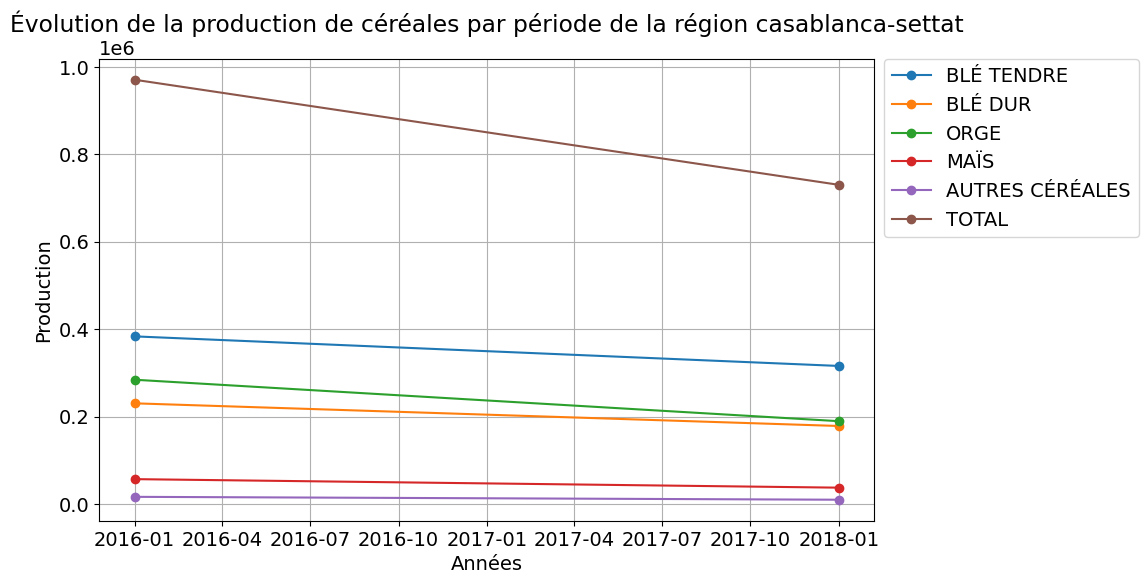

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
dataframe = pd.read_csv("/content/drive/MyDrive/regionalpython/indicateurcasa.csv", sep=",", encoding="ISO-8859-1")



print(dataframe)
print(dataframe.columns)
dataframe.columns = [ 'ZONEGÉOGRAPHIQUE'	,'PÉRIODE'	,'BLÉ TENDRE' ,	'BLÉ DUR' ,	'ORGE'	,'MAÏS','AUTRES CÉRÉALES',	'TOTAL']
dataframe['MAÏS'] = pd.to_numeric(dataframe['MAÏS'], errors='coerce').fillna(0)

columns_to_plot = ['PÉRIODE', 'BLÉ TENDRE', 'BLÉ DUR', 'ORGE', 'MAÏS','AUTRES CÉRÉALES', 	'TOTAL']

# Convertir 'PÉRIODE' en datetime si ce n'est pas déjà le cas
dataframe['PÉRIODE'] = pd.to_datetime(dataframe['PÉRIODE'], format='%Y')

# Définir 'PÉRIODE' comme index
dataframe.set_index('PÉRIODE', inplace=True)

# Tracer un graphique linéaire pour visualiser l'évolution de la production au fil des années
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})

for cereal in columns_to_plot[1:]:  # Ignorer 'PÉRIODE' dans la liste des colonnes à tracer
    plt.plot(dataframe.index, dataframe[cereal], marker='o', label=cereal)

plt.ylabel("Production")
plt.xlabel('Années')
plt.grid()
plt.legend(bbox_to_anchor=(1, 1.02))
plt.title("Évolution de la production de céréales par période de la région casablanca-settat")
plt.show()
table = go.Figure(data=[go.Table(
    header=dict(values=list(dataframe.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[dataframe[col] for col in dataframe.columns],
               fill_color='lavender',
               align='left'))
])

table.show()

  Zone gÃ©ographique  PÃ©riode  BlÃ© Tendre  BlÃ© Dur   Orge  MaÃ¯s    Total
0     Marrakech-Safi      2015        402.3     192.8  642.9  55.92  1293.92
1     Marrakech-Safi      2016        176.1     121.2  202.9  60.70   560.90
2     Marrakech-Safi      2017        413.5     242.6  636.2  63.10  1355.40
3     Marrakech-Safi      2018        317.1     225.7  414.6  75.40  1032.80
4     Marrakech-Safi      2019        163.3     140.1  212.4  20.80   536.50
Index(['Zone gÃ©ographique', 'PÃ©riode', 'BlÃ© Tendre', 'BlÃ© Dur', 'Orge',
       'MaÃ¯s', 'Total'],
      dtype='object')


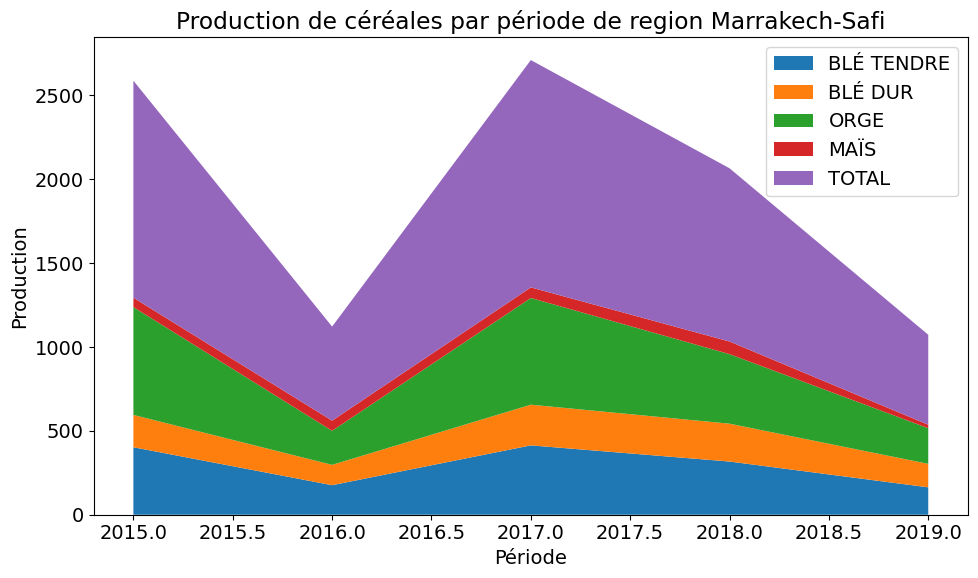

In [12]:


import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt

# Remplacez le chemin du fichier par votre propre chemin
dataframe = pd.read_csv("/content/drive/MyDrive/regionalpython/indicateurmerakex.csv", sep=",", encoding="ISO-8859-1")

# Vérifiez les données et les colonnes
print(dataframe)
print(dataframe.columns)

# Renommez les colonnes si nécessaire
dataframe.columns = ['ZONEGÉOGRAPHIQUE', 'PÉRIODE', 'BLÉ TENDRE', 'BLÉ DUR', 'ORGE', 'MAÏS', 'TOTAL']

# Convertissez la colonne 'MAÏS' en numérique et remplacez les valeurs non numériques par 0
dataframe['MAÏS'] = pd.to_numeric(dataframe['MAÏS'], errors='coerce').fillna(0)

# Choisissez les colonnes à utiliser dans le graphique
columns_to_plot = ['BLÉ TENDRE', 'BLÉ DUR', 'ORGE', 'MAÏS','TOTAL']

# Préparez les données pour stackplot
x = dataframe['PÉRIODE']
y = [dataframe[col] for col in columns_to_plot]

# Créez le graphique stackplot
plt.figure(figsize=(10, 6))
plt.stackplot(x, y, labels=columns_to_plot)
plt.xlabel('Période')
plt.ylabel('Production')
plt.title('Production de céréales par période de region Marrakech-Safi')
plt.legend()
plt.tight_layout()
plt.show()
table = go.Figure(data=[go.Table(
    header=dict(values=list(dataframe.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[dataframe[col] for col in dataframe.columns],
               fill_color='lavender',
               align='left'))
])

table.show()

           Zone gÃ©ographique  PÃ©riode  Unnamed: 2
0  Tanger-TÃ©touan-Al Hoceima      2018      710760
1  Tanger-TÃ©touan-Al Hoceima      2019      710760
2  Tanger-TÃ©touan-Al Hoceima      2020      710760
3  Tanger-TÃ©touan-Al Hoceima      2021      710760
Index(['Zone gÃ©ographique', 'PÃ©riode', 'Unnamed: 2'], dtype='object')


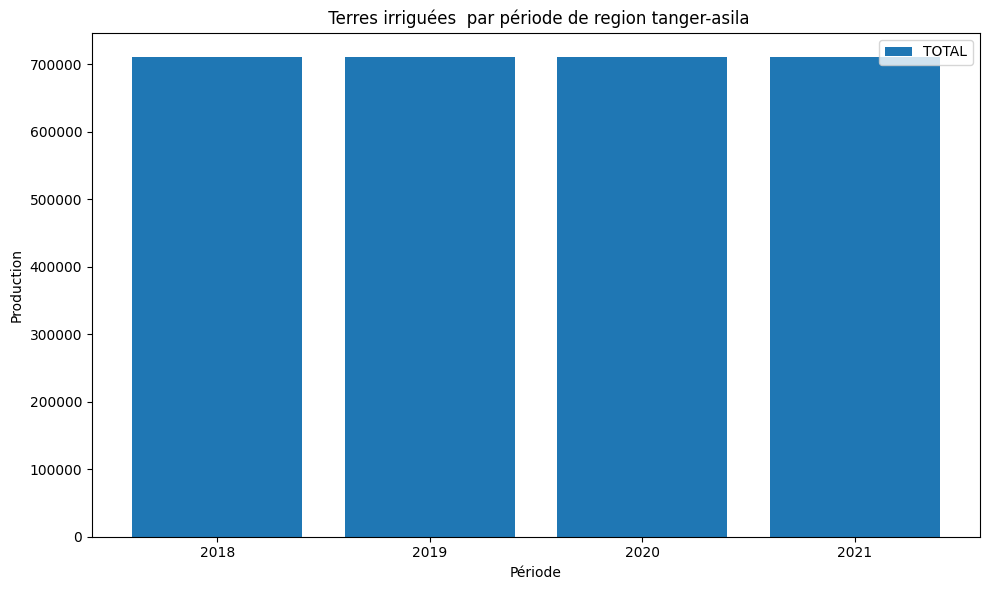

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Remplacez le chemin du fichier par votre propre chemin
dataframe = pd.read_csv("/content/drive/MyDrive/agricolutileregion/indicateurtanger.csv", sep=",", encoding="ISO-8859-1")

# Vérifiez les données et les colonnes
print(dataframe)
print(dataframe.columns)

# Renommez les colonnes si nécessaire
dataframe.columns = ['ZONEGÉOGRAPHIQUE', 'PÉRIODE',  'TOTAL']

# Convertissez la colonne 'MAÏS' en numérique et remplacez les valeurs non numériques par 0


# Choisissez les colonnes à utiliser dans le graphique
columns_to_plot = ['TOTAL']

# Créez un graphique à barres empilées
plt.figure(figsize=(10, 6))
bottom = 0

for col in columns_to_plot:
    plt.bar(dataframe['PÉRIODE'], dataframe[col], label=col, bottom=bottom)
    bottom += dataframe[col]

plt.xlabel('Période')
plt.ylabel('Production')
plt.title(' Terres irriguées  par période de region tanger-asila')
plt.legend()
plt.xticks(dataframe['PÉRIODE'])  # Assurez-vous que les périodes sont affichées correctement sur l'axe des x
plt.tight_layout()
plt.show()



  Zone gÃ©ographique  PÃ©riode  Unnamed: 2
0  Casablanca-Settat      2016     1356933
Index(['Zone gÃ©ographique', 'PÃ©riode', 'Unnamed: 2'], dtype='object')


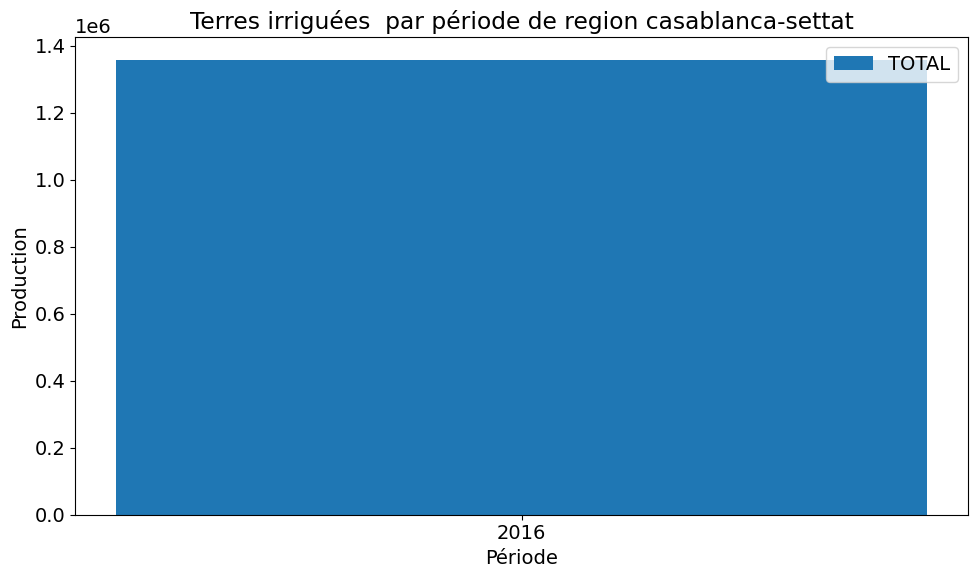

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Remplacez le chemin du fichier par votre propre chemin
dataframe = pd.read_csv("/content/drive/MyDrive/agricolutileregion/indicateurcasa.csv", sep=",", encoding="ISO-8859-1")

# Vérifiez les données et les colonnes
print(dataframe)
print(dataframe.columns)

# Renommez les colonnes si nécessaire
dataframe.columns = ['ZONEGÉOGRAPHIQUE', 'PÉRIODE',  'TOTAL']

# Convertissez la colonne 'MAÏS' en numérique et remplacez les valeurs non numériques par 0


# Choisissez les colonnes à utiliser dans le graphique
columns_to_plot = ['TOTAL']

# Créez un graphique à barres empilées
plt.figure(figsize=(10, 6))
bottom = 0

for col in columns_to_plot:
    plt.bar(dataframe['PÉRIODE'], dataframe[col], label=col, bottom=bottom)
    bottom += dataframe[col]

plt.xlabel('Période')
plt.ylabel('Production')
plt.title('Terres irriguées  par période de region casablanca-settat')
plt.legend()
plt.xticks(dataframe['PÉRIODE'])  # Assurez-vous que les périodes sont affichées correctement sur l'axe des x
plt.tight_layout()
plt.show()

           Zone gÃ©ographique  PÃ©riode    FÃ¨ve  Petit pois  Lentille  \
0  Tanger-TÃ©touan-Al Hoceima      2014   8700.0     3640.00   2651.00   
1  Tanger-TÃ©touan-Al Hoceima      2015  13128.5     5166.59   3065.68   
2  Tanger-TÃ©touan-Al Hoceima      2016   6572.0     1685.00   2180.00   
3  Tanger-TÃ©touan-Al Hoceima      2017  11662.0     4678.00   3228.00   
4  Tanger-TÃ©touan-Al Hoceima      2018  10716.0     4128.00   2602.00   
5  Tanger-TÃ©touan-Al Hoceima      2019  10730.0     5898.00   4305.00   
6  Tanger-TÃ©touan-Al Hoceima      2020   9482.0     4425.00   4003.00   
7  Tanger-TÃ©touan-Al Hoceima      2021   8166.0     3166.00   3489.00   

   Pois chiche  Autres lÃ©gumineuses     Total  
0        10355                  2940  28286.00  
1        13404                  3627  38391.77  
2         8825                  3785  23047.00  
3         7656                  4065  31289.00  
4        12915                  2860  33221.00  
5        12544                  4992  3

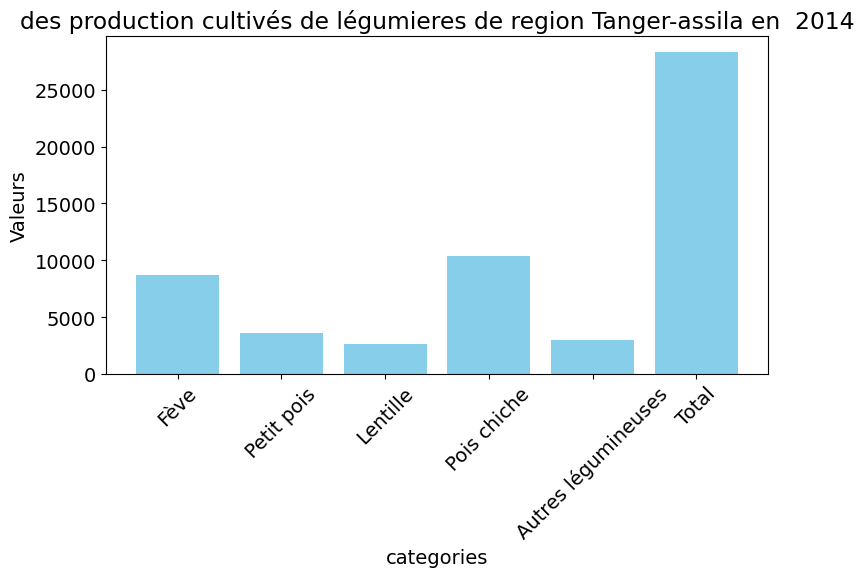

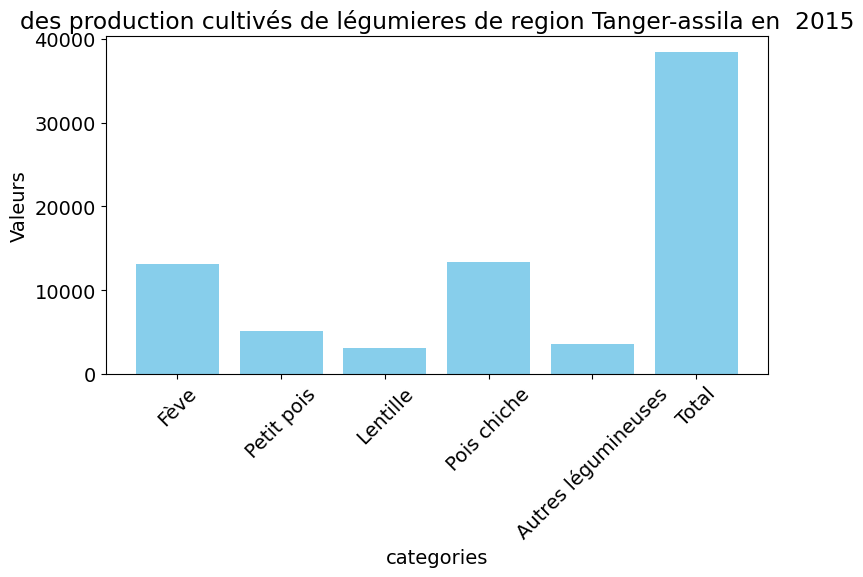

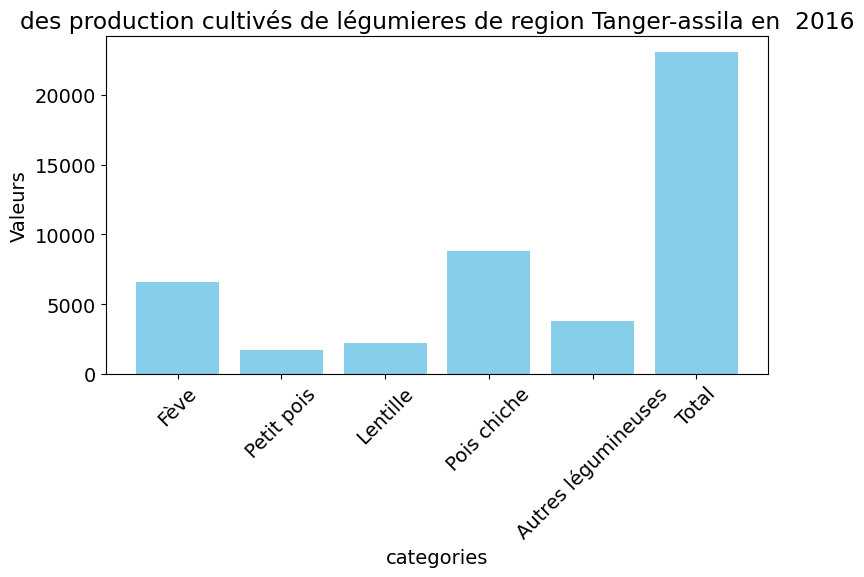

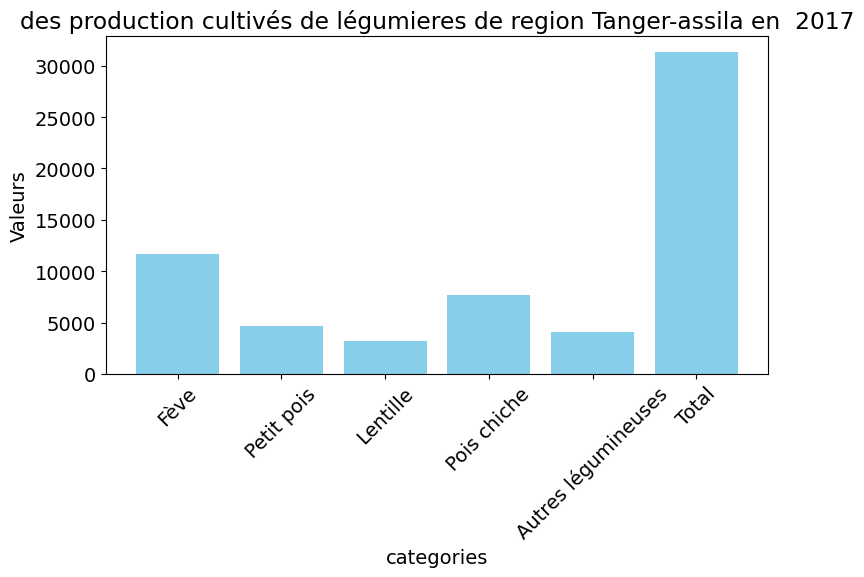

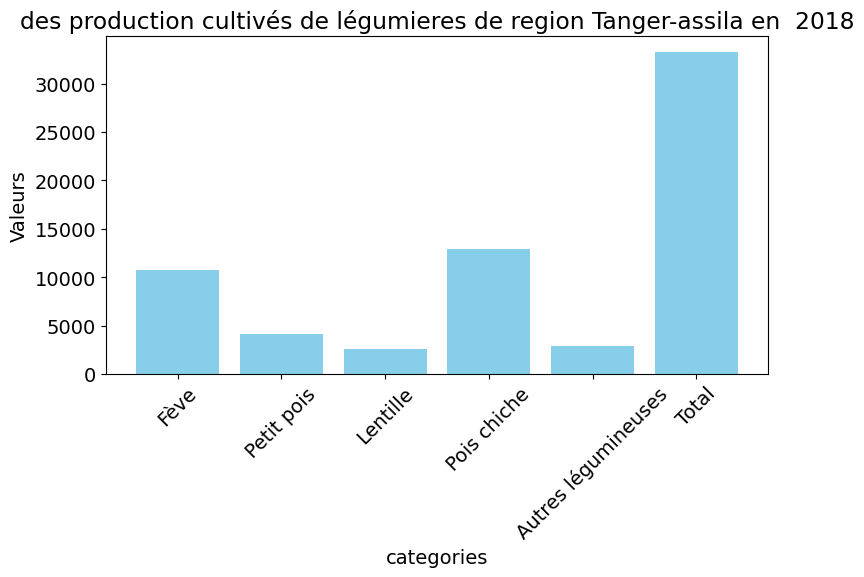

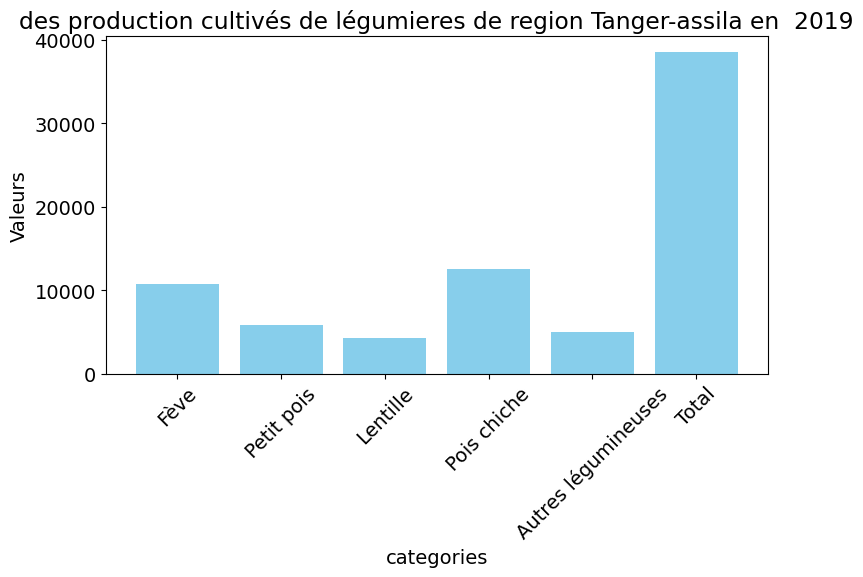

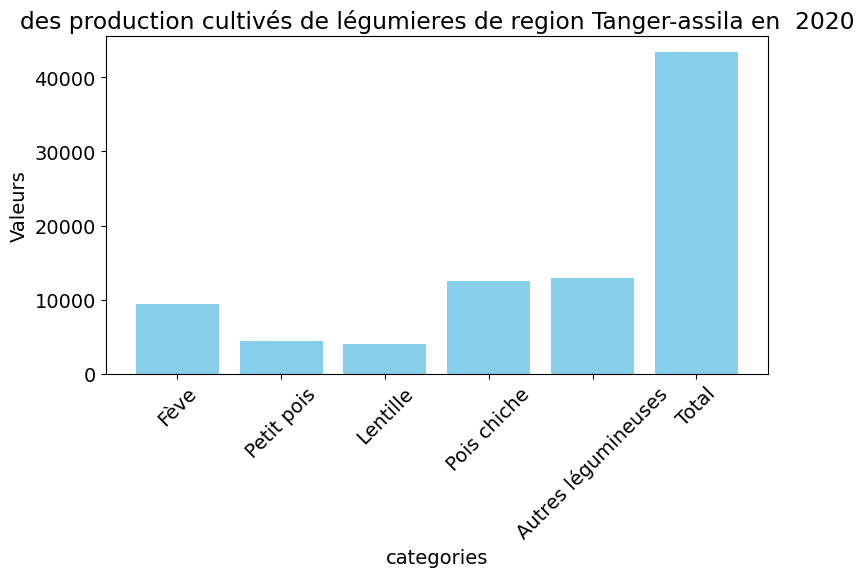

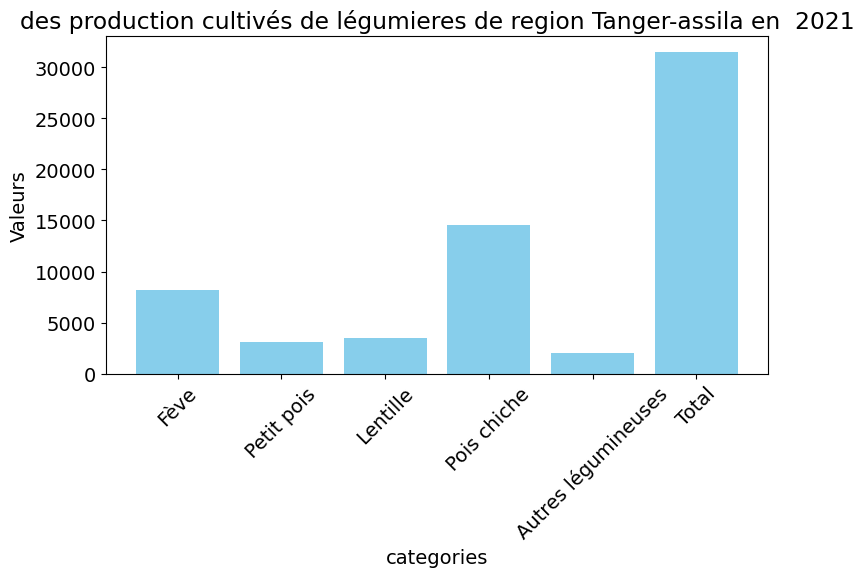

In [16]:

import pandas as pd
import matplotlib.pyplot as plt

# Chargez vos données depuis le fichier CSV
dataframe = pd.read_csv("/content/drive/MyDrive/cullugumiereregionel/indicateur.csv", sep=",", encoding="ISO-8859-1")
print(dataframe)
# Renommez les colonnes si nécessaire
dataframe.columns = ['ZONEGÉOGRAPHIQUE', 'PÉRIODE', 'Fève', 'Petit pois', 'Lentille', 'Pois chiche', 'Autres légumineuses', 'Total']

# Sélectionnez les colonnes de données pertinentes
data = dataframe[['PÉRIODE', 'Fève', 'Petit pois', 'Lentille', 'Pois chiche', 'Autres légumineuses', 'Total']]

# Créez le graphique à barres pour chaque période
for period in data['PÉRIODE'].unique():
    subset = data[data['PÉRIODE'] == period]
    categories = ['Fève', 'Petit pois', 'Lentille', 'Pois chiche', 'Autres légumineuses', 'Total']
    values = subset.iloc[0][categories].values
    plt.figure(figsize=(8, 6))
    plt.bar(categories, values, color='skyblue')
    plt.xlabel('categories')
    plt.ylabel('Valeurs')
    plt.title(f'des production cultivés de légumieres de region Tanger-assila en  {period}')
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()



  Zone gÃ©ographique  PÃ©riode  FÃ¨ve  Petit pois  Lentille  Pois chiche  \
0  Casablanca-Settat      2016  16398        7056     17390         5950   
1  Casablanca-Settat      2018  11700       10900     16900        11000   

   Autres lÃ©gumineuses  Total  
0                  1751  48545  
1                  5000  55500  


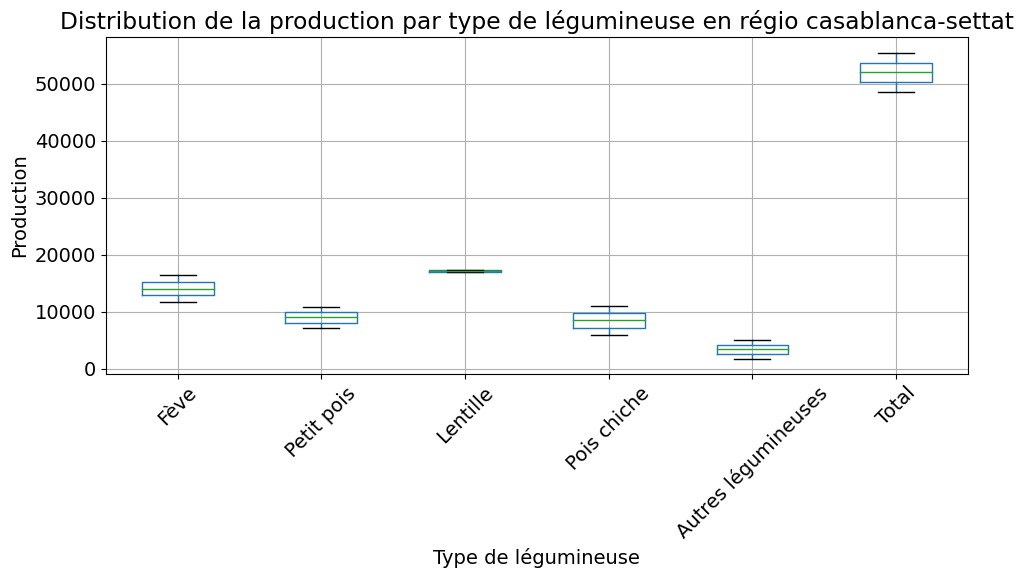

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Chargez vos données depuis le fichier CSV
dataframe = pd.read_csv("/content/drive/MyDrive/cullugumiereregionel/indicateur_cas.csv", sep=",", encoding="ISO-8859-1")
print(dataframe)
# Renommez les colonnes si nécessaire
dataframe.columns = ['ZONEGÉOGRAPHIQUE', 'PÉRIODE', 'Fève', 'Petit pois', 'Lentille', 'Pois chiche', 'Autres légumineuses', 'Total']

# Sélectionnez les colonnes de données pertinentes
data = dataframe[['Fève', 'Petit pois', 'Lentille', 'Pois chiche', 'Autres légumineuses', 'Total']]

# Créez un diagramme de type boxplot pour chaque colonne de données
plt.figure(figsize=(10, 6))
data.boxplot()
plt.xlabel('Type de légumineuse')
plt.ylabel('Production')
plt.title('Distribution de la production par type de légumineuse en régio casablanca-settat')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





  Zone gÃ©ographique  PÃ©riode  FÃ¨ve  Petit pois  Lentille  Pois chiche  \
0       FÃ¨s-MeknÃ¨s      2015  128.8      17.100     6.000        12.10   
1       FÃ¨s-MeknÃ¨s      2016   49.9      11.900     6.400        33.60   
2       FÃ¨s-MeknÃ¨s      2017   80.4      13.100     5.600        12.80   
3       FÃ¨s-MeknÃ¨s      2018   86.1      11.900     5.600        33.70   
4       FÃ¨s-MeknÃ¨s      2019   82.3      12.800     4.600        30.80   
5       FÃ¨s-MeknÃ¨s      2020   66.3      11.882     3.465        22.52   

     Total  
0  189.800  
1  110.500  
2  124.100  
3  140.000  
4  131.100  
5  104.167  


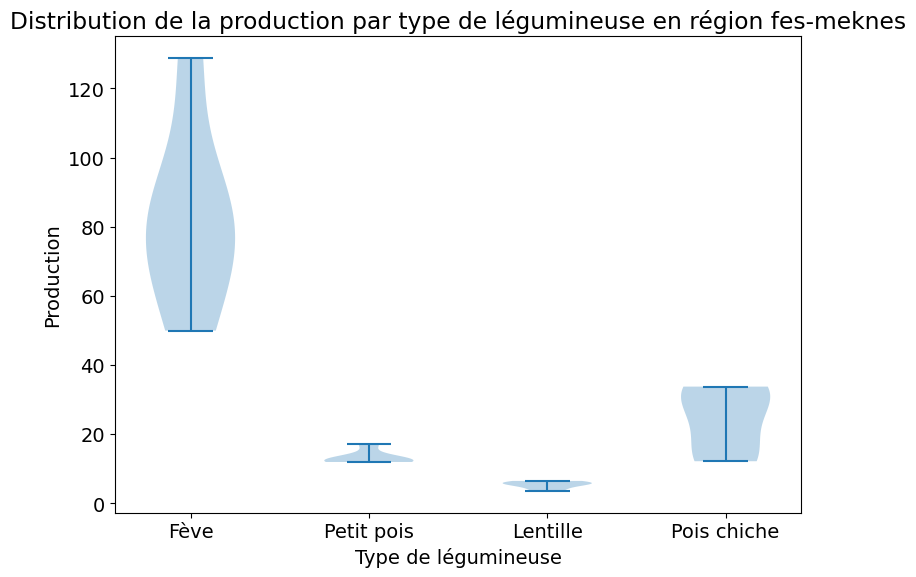

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Chargez vos données depuis le fichier CSV
dataframe = pd.read_csv("/content/drive/MyDrive/cullugumiereregionel/indicateur_fes.csv", sep=",", encoding="ISO-8859-1")
print(dataframe)
# Renommez les colonnes si nécessaire
dataframe.columns = ['ZONEGÉOGRAPHIQUE', 'PÉRIODE', 'Fève', 'Petit pois', 'Lentille', 'Pois chiche',  'Total']

# Sélectionnez les colonnes de données pertinentes
data = dataframe[['Fève', 'Petit pois', 'Lentille', 'Pois chiche']]

# Créer un graphique de violon à partir des données
plt.figure(figsize=(8, 6))
plt.violinplot(data.values, showmeans=False, showmedians=False)
plt.xlabel('Type de légumineuse')
plt.ylabel('Production')
plt.title('Distribution de la production par type de légumineuse en région fes-meknes')
plt.xticks(ticks=range(1, len(data.columns) + 1), labels=data.columns)
plt.tight_layout()
plt.show()




In [ ]:
pip install mplcursors


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21166 sha256=ac5895509eb43b598b7a6a6931b28402cfcd0189a338fa6e84d504860687b327
  Stored in directory: /root/.cache/pip/wheels/b5/5b/fb/aed35cc15262c380536820fa3cb2e2d41fb52450de918a6785
Successfully built mplcursors


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import mplcursors

# # Chargez vos données depuis le fichier CSV
# dataframe = pd.read_csv("/content/drive/MyDrive/cullugumiereregionel/indicateur.csv", sep=",", encoding="ISO-8859-1")

# # Renommez les colonnes si nécessaire
# dataframe.columns = ['ZONEGÉOGRAPHIQUE', 'PÉRIODE', 'Fève', 'Petit pois', 'Lentille', 'Pois chiche', 'Autres légumineuses', 'Total']



# # Groupement des données par année
# grouped_data = dataframe.groupby(dataframe['PÉRIODE']).sum()

# # Créez la fonction pour afficher le pie chart
# def show_pie_chart(year):
#     plt.figure(figsize=(8, 8))
#     plt.pie(grouped_data.loc[year], labels=grouped_data.columns, autopct='%1.1f%%', startangle=140)
#     plt.title(f'Distribution de la production par type de légumineuse pour {year}')
#     plt.show()

# # Créez le diagramme interactif en utilisant mplcursors
# fig, ax = plt.subplots(figsize=(10, 6))
# ax.scatter(dataframe['PÉRIODE'], dataframe['Total'])

# # Extraire les années uniques pour définir les ticks sur l'axe x
# years = grouped_data.index

# cursor = mplcursors.cursor(ax, hover=True)
# @cursor.connect("add")
# def on_add(sel):
#     year = int(sel.target[0])
#     show_pie_chart(year)

# plt.xlabel('Année')
# plt.ylabel('Total de la production')
# plt.title('Cliquez sur les points pour voir la distribution par type de légumineuse')
# plt.xticks(years)  # Utiliser les années extraites comme ticks sur l'axe x
# plt.tight_layout()
# plt.show()



# import pandas as pd
# import matplotlib.pyplot as plt
# import mplcursors

# # Chargez vos données depuis le fichier CSV
# dataframe = pd.read_csv("/content/drive/MyDrive/cullugumiereregionel/indicateur.csv", sep=",", encoding="ISO-8859-1")

# # Renommez les colonnes si nécessaire
# dataframe.columns = ['ZONEGÉOGRAPHIQUE', 'PÉRIODE', 'Fève', 'Petit pois', 'Lentille', 'Pois chiche', 'Autres légumineuses', 'Total']

# # Sélectionnez les colonnes pertinentes pour le pie chart interactif
# selected_columns = ['Fève', 'Petit pois', 'Lentille', 'Pois chiche', 'Autres légumineuses']

# # Créez un sous-DataFrame avec les colonnes sélectionnées
# data_selected = dataframe[['PÉRIODE'] + selected_columns]

# # Groupement des données par année et somme des valeurs pour chaque colonne
# grouped_data = data_selected.groupby('PÉRIODE').sum()

# # Créez la fonction pour afficher le pie chart
# def show_pie_chart(year):
#     plt.figure(figsize=(8, 8))
#     plt.pie(grouped_data.loc[year], labels=grouped_data.columns, autopct='%1.1f%%', startangle=140)
#     plt.title(f'Distribution de la production par type de légumineuse pour {year}')
#     plt.show()

# # Créez le diagramme interactif en utilisant mplcursors
# fig, ax = plt.subplots(figsize=(10, 6))
# scatter = ax.scatter(dataframe['PÉRIODE'], dataframe['Total'])

# cursor = mplcursors.cursor(scatter)
# @cursor.connect("add")
# def on_add(sel):
#     index = sel.index
#     x_val = sel.artist.get_offsets()[index][0]
#     year = pd.to_datetime(x_val).year
#     show_pie_chart(year)

# plt.xlabel('Année')
# plt.ylabel('Total de la production')
# plt.title('Cliquez sur les points pour voir la distribution par type de légumineuse')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors

# Chargez vos données depuis le fichier CSV
dataframe = pd.read_csv("/content/drive/MyDrive/cullugumiereregionel/indicateurorietal.csv", sep=",", encoding="ISO-8859-1")

# Renommez les colonnes si nécessaire
dataframe.columns = ['ZONEGÉOGRAPHIQUE', 'PÉRIODE', 'Fève', 'Petit pois', 'Lentille', 'Pois chiche', 'Autres légumineuses', 'Total']

# Sélectionnez les colonnes pertinentes pour le pie chart interactif
selected_columns = ['Fève', 'Petit pois', 'Lentille', 'Pois chiche', 'Autres légumineuses']

# Créez un sous-DataFrame avec les colonnes sélectionnées
data_selected = dataframe[['PÉRIODE'] + selected_columns]

# Groupement des données par année et somme des valeurs pour chaque colonne
grouped_data = data_selected.groupby('PÉRIODE').sum()

# Créez la fonction pour afficher le pie chart
def show_pie_chart(year):
    plt.figure(figsize=(8, 8))
    plt.pie(grouped_data.loc[year], labels=grouped_data.columns, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution de la production par type de légumineuse pour {year}')
    plt.show()

# Créez le diagramme interactif en utilisant mplcursors
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(dataframe['PÉRIODE'], dataframe['Total'])

cursor = mplcursors.cursor(scatter)
@cursor.connect("add")
def on_add(sel):
    x_val = sel.target[0]
    year = pd.to_datetime(x_val).year
    show_pie_chart(year)

plt.xlabel('Année')
plt.ylabel('Total de la production')
plt.title('Cliquez sur les points pour voir la distribution par type de légumineuse')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




ValueError: ignored

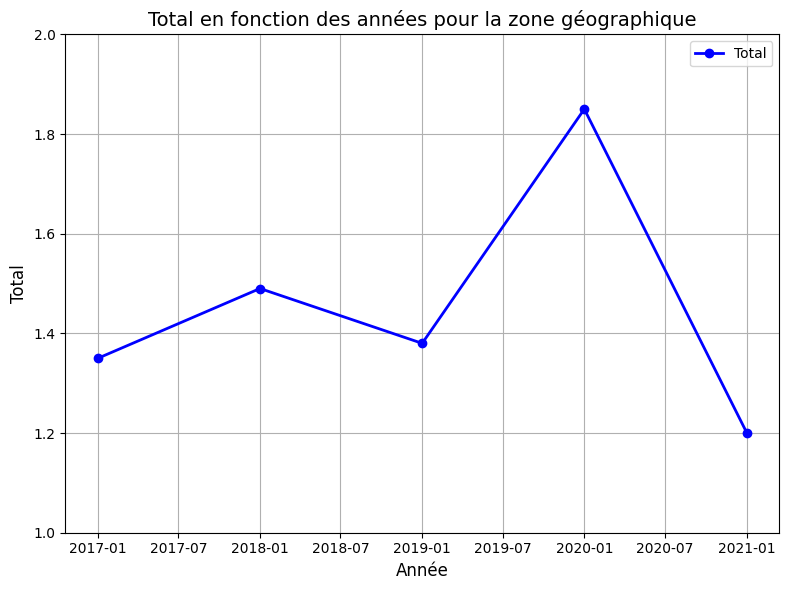

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Créez un DataFrame à partir des données
data = {
    'Zone géographique': ['Oriental', 'Oriental', 'Oriental', 'Oriental', 'Oriental'],
    'Période': [2017, 2018, 2019, 2020, 2021],
    'Total': [1.35, 1.49, 1.38, 1.85, 1.20]
}

df = pd.DataFrame(data)

# Convertir la colonne 'Période' en type datetime si nécessaire
df['Période'] = pd.to_datetime(df['Période'], format='%Y')

# Créer le graphique linéaire avec des styles personnalisés
plt.figure(figsize=(8, 6))

# Tracer la ligne avec des marqueurs ronds ('o') et une ligne pleine ('-')
plt.plot(df['Période'], df['Total'], marker='o', linestyle='-', color='blue', linewidth=2, label='Total')

# Ajouter des titres et étiquettes d'axe
plt.xlabel('Année', fontsize=12)
plt.ylabel('Total', fontsize=12)
plt.title('Total en fonction des années pour la zone géographique', fontsize=14)

# Activer la grille et ajuster les limites si nécessaire
plt.grid(True)
plt.ylim(1.0, 2.0)  # Limite pour l'axe des ordonnées

# Ajouter une légende
plt.legend(loc='best')

# Afficher le graphique
plt.tight_layout()
plt.show()


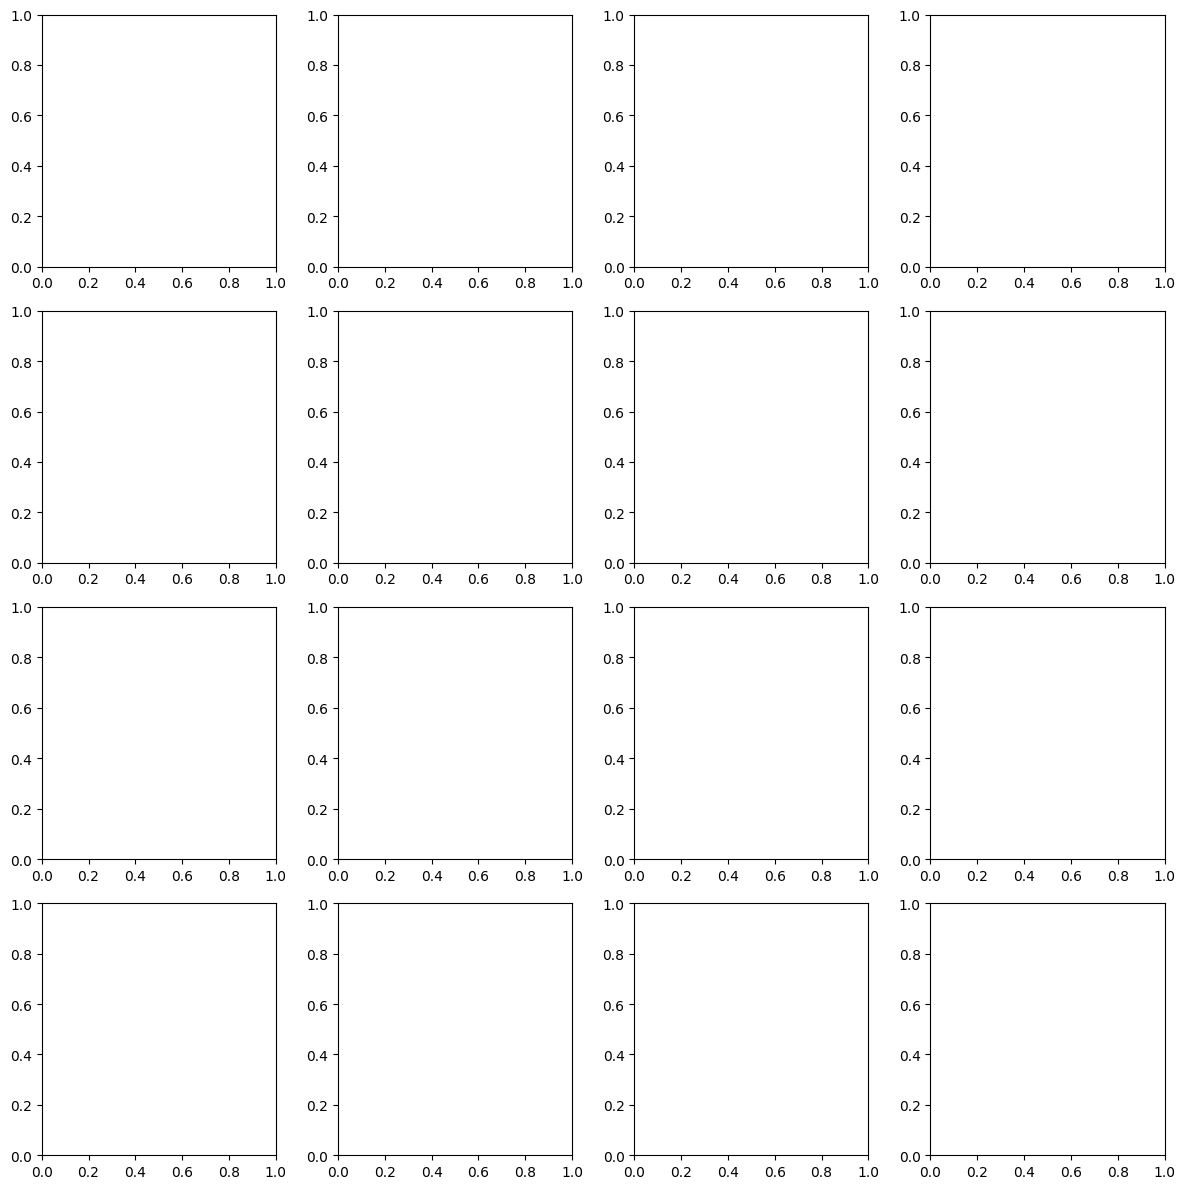

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Chargez vos données depuis le fichier CSV
dataframe = pd.read_csv("/content/drive/MyDrive/cullugumiereregionel/indicateurorietal.csv", sep=",", encoding="ISO-8859-1")

# Renommez les colonnes si nécessaire
dataframe.columns = ['ZONEGÉOGRAPHIQUE', 'PÉRIODE', 'Total']

# Supprimer les colonnes non numériques ou non pertinentes pour les graphiques de nuages de points
data = dataframe.drop(['ZONEGÉOGRAPHIQUE', 'PÉRIODE', 'Total'], axis=1)

# Créer des graphiques de nuages de points pour chaque paire de colonnes
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))

# Ajuster l'espacement entre les graphiques pour éviter les superpositions
plt.tight_layout()

# Parcourir toutes les combinaisons de colonnes pour créer les nuages de points
for i, col1 in enumerate(data.columns):
    for j, col2 in enumerate(data.columns):
        if i != j:
            axes[i, j].scatter(data[col1], data[col2], alpha=0.5)
            axes[i, j].set_xlabel(col1)
            axes[i, j].set_ylabel(col2)

# Afficher les graphiques
plt.show()





In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np

# Générer des données aléatoires pour simuler des coordonnées géographiques
np.random.seed(42)
num_points = 3
coords = [(np.random.uniform(35, 40), np.random.uniform(-5, 0)) for _ in range(num_points)]

# Créer un DataFrame avec des données fictives
data = {
    'ZONEGÉOGRAPHIQUE': ['Point A', 'Point B', 'Point C'],
    'Total': [15, 25, 30],
}

# Créer un GeoDataFrame en utilisant les données et les coordonnées
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy([x[0] for x in coords], [x[1] for x in coords]))

# Afficher le GeoDataFrame
print(gdf)



  ZONEGÉOGRAPHIQUE  Total                   geometry
0          Point A     15  POINT (36.87270 -0.24643)
1          Point B     25  POINT (38.65997 -2.00671)
2          Point C     30  POINT (35.78009 -4.22003)


NameError: ignored

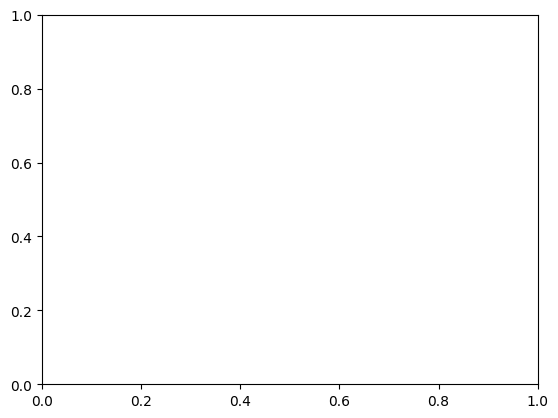

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Chargez vos données depuis le fichier CSV
# dataframe = pd.read_csv("/content/drive/MyDrive/cullugumiereregionel/indicateur_cas.csv", sep=",", encoding="ISO-8859-1")

# # Renommez les colonnes si nécessaire
# dataframe.columns = ['ZONEGÉOGRAPHIQUE', 'PÉRIODE', 'Fève', 'Petit pois', 'Lentille', 'Pois chiche', 'Autres légumineuses', 'Total']

# # Sélectionnez les colonnes de données pertinentes
# data = dataframe[['Fève', 'Petit pois', 'Lentille', 'Pois chiche', 'Autres légumineuses', 'Total']]
# plt.eventplot(D)
# plt.xlabel('Événements')
# plt.ylabel('Index de ligne')
# plt.title('Représentation des événements')
# plt.show()


import pandas as pd
import matplotlib.pyplot as plt

# Chargez vos données depuis le fichier CSV
dataframe = pd.read_csv("/content/drive/MyDrive/cullugumiereregionel/indicateur_marakex.csv", sep=",", encoding="ISO-8859-1")

# Renommez les colonnes si nécessaire
dataframe.columns = ['ZONEGÉOGRAPHIQUE', 'PÉRIODE', 'Fève', 'Petit pois', 'Lentille', 'Pois chiche', 'Total']

# Sélectionnez les colonnes de données pertinentes
data = dataframe[['Fève', 'Petit pois', 'Lentille', 'Pois chiche']]

# Somme des valeurs pour chaque catégorie de légumineuse
total_values = data.sum()

# Remplacer les caractères non numériques par NaN
total_values = total_values.replace('-', pd.NA)

# Convertir les valeurs en flottants en ignorant les erreurs
total_values = total_values.apply(pd.to_numeric, errors='coerce')

# Supprimer les valeurs NaN
total_values = total_values.dropna()

# Créez un diagramme circulaire (pie chart)
plt.figure(figsize=(8, 8))
plt.pie(total_values, labels=total_values.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des valeurs pour différentes légumineuses')
plt.axis('equal')  # Ajuste l'aspect pour être un cercle
plt.show()






In [2]:
pip install dash pandas geopandas plotly


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 26.8 MB/s eta 0:00:00


<ipython-input-15-06563bc55b0e>:41: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



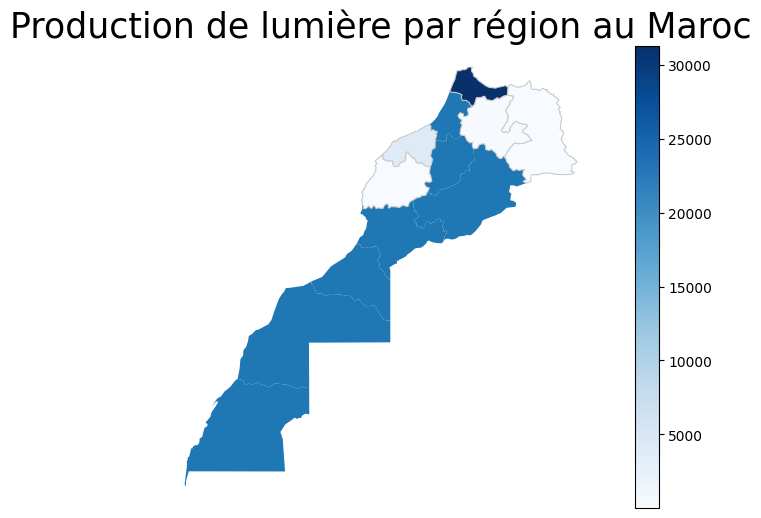

In [15]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Charger les données géographiques (GeoJSON)
map_df = gpd.read_file('/content/drive/MyDrive/maroc.geojson')

# Charger les données sur la production de lumière
df = pd.read_csv("/content/drive/MyDrive/lugumieres2017.csv", sep=";", encoding="ISO-8859-1")
# Remplacer le nom de la région incorrectement orthographié


# Renommer les colonnes pour correspondre à vos données
data_for_map = df.rename(columns={'Zone géographique': 'region',
                                  'Total': 'light_production'})

# Fusionner les données géographiques avec les données de production de lumière
merged = pd.merge(map_df, data_for_map, left_on='region', right_on='region', how='left')

# Nom de la colonne représentant la production de lumière
variable = 'light_production'

# Créer la figure et les axes pour Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# Afficher la carte de base du Maroc
map_df.plot(ax=ax)

# Afficher les régions avec les données de production de lumière
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Supprimer les axes
ax.axis('off')

# Ajouter un titre
ax.set_title('Production de lumière par région au Maroc', fontdict={'fontsize': '25', 'fontweight': '3'})

# Créer la barre de couleur en tant que légende
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=merged[variable].min(), vmax=merged[variable].max()))
sm._A = []
cbar = fig.colorbar(sm)

# Afficher la carte
plt.show()


In [14]:
import dash
from dash import html, dcc
import plotly.express as px
import pandas as pd
import geopandas as gpd

# Charger les données géographiques (GeoJSON)
map_df = gpd.read_file('/content/drive/MyDrive/maroc.geojson')

# Charger les données sur la production de lumière
df = pd.read_csv("/content/drive/MyDrive/lugumieres2018.csv", sep=";", encoding="ISO-8859-1")

# Renommer les colonnes pour correspondre à vos données
data_for_map = df.rename(columns={'Zone géographique': 'region',
                                  'Total': 'light_production'})

# Fusionner les données géographiques avec les données de production de lumière
merged = pd.merge(map_df, data_for_map, left_on='region', right_on='region', how='left')

# Créer une application Dash
app = dash.Dash(__name__)

# Créer la mise en page du tableau de bord
app.layout = html.Div([
    html.H1("Dashboard des Statistiques"),

    # Ajouter une carte
    dcc.Graph(
        id='map',
        figure=px.choropleth_mapbox(
            merged,
            geojson=merged.geometry,
            locations=merged.index,
            color='light_production',
            mapbox_style="carto-positron",
            center={"lat": 31.7917, "lon": -7.0926},
            zoom=5,
            opacity=0.5
        )
    ),

    # Ajouter d'autres composants ou visualisations ici...

])

# Lancer l'application
if __name__ == '__main__':
    app.run_server(debug=True)



<IPython.core.display.Javascript object>

In [9]:



import folium
import geopandas as gpd
import pandas as pd

# Charger le fichier GeoJSON contenant les régions géographiques
geojson_file = '/content/drive/MyDrive/maroc.geojson'
regions = gpd.read_file(geojson_file)

# Charger vos données de production depuis le fichier CSV
dataframe = pd.read_csv("/content/drive/MyDrive/lugumieres2018.csv", sep=";", encoding="ISO-8859-1")
dataframe.columns = ['ZONEGÉOGRAPHIQUE', 'Total']
dataframe2 = pd.read_csv("/content/drive/MyDrive/productioncereales2018.csv", sep=";", encoding="ISO-8859-1")
dataframe2.columns = ['ZONEGÉOGRAPHIQUE', 'Total']
dataframe3 = pd.read_csv("/content/drive/MyDrive/cereales2018.csv", sep=";", encoding="ISO-8859-1")
dataframe3.columns = ['ZONEGÉOGRAPHIQUE', 'Total']
print(dataframe.columns)


print(dataframe['Total'])

# dataframe['Total'] = pd.to_numeric(dataframe['Total'], errors='coerce')

# print(dataframe['Total'])
# Créer une carte interactive avec Folium
m = folium.Map(location=[31.7917, -7.0926], zoom_start=6)

# Ajouter les régions sur la carte
for idx, row in regions.iterrows():
    region_name = row['region']
    production = dataframe[dataframe['ZONEGÉOGRAPHIQUE'] == region_name]['Total'].values
    production2 = dataframe2[dataframe2['ZONEGÉOGRAPHIQUE'] == region_name]['Total'].values
    production3 = dataframe3[dataframe3['ZONEGÉOGRAPHIQUE'] == region_name]['Total'].values
    folium.GeoJson(
        row['geometry'],
        style_function=lambda feature: {
            'fillColor': 'green' if production > 1000
            else 'yellow' if 500 < production <= 1000
            else 'red',
            'color': 'black',
            'weight': 1
        },
        tooltip=f"Région : {region_name}\nProduction de légumineuses : {production}\n\nProduction de céréales :{production2}"f"Région : {region_name}\nProduction de cultures céréales : {production3}"
    ).add_to(m)
# Afficher la carte interactive
m



# print(regions['region'])
# print(dataframe['ZONEGÉOGRAPHIQUE'])
# print(dataframe2['ZONEGÉOGRAPHIQUE'])
# print(dataframe3['ZONEGÉOGRAPHIQUE'])
# # Normaliser les noms de région dans dataframe2 et dataframe3 pour correspondre à ceux du GeoJSON
# dataframe2['ZONEGÉOGRAPHIQUE'] = dataframe2['ZONEGÉOGRAPHIQUE'].str.replace('Tanger-Tétouan-Hoceima', 'Tanger-Tetouan-Hoceima')
# dataframe3['ZONEGÉOGRAPHIQUE'] = dataframe3['ZONEGÉOGRAPHIQUE'].str.replace('Tanger-Tétouan-Hoceima', 'Tanger-Tetouan-Hoceima')
# # Assurez-vous de traiter tous les autres cas de différences dans les noms de région

# for idx, row in regions.iterrows():
#     region_name = row['region']
#     production = dataframe[dataframe['ZONEGÉOGRAPHIQUE'] == region_name]['Total'].values[0]
#     production2 = dataframe2[dataframe2['ZONEGÉOGRAPHIQUE'] == region_name]['Total'].values[0]
#     production3 = dataframe3[dataframe3['ZONEGÉOGRAPHIQUE'] == region_name]['Total'].values[0]

#     # Définir les seuils de production
#     if production > 1000:
#         fillColor = 'green'
#     elif 500 < production <= 1000:
#         fillColor = 'yellow'
#     else:
#         fillColor = 'red'

#     # Créer le style en fonction de la production
#     style = {
#         'fillColor': fillColor,
#         'color': 'black',
#         'weight': 1,
#         'fillOpacity': 0.6  # Ajuster l'opacité du remplissage
#     }

#     # Créer le tooltip avec les valeurs formatées
#     tooltip_text = f"Région : {region_name}<br>" \
#                    f"Production de légumineuses : {production}<br>" \
#                    f"Production de céréales : {production2}<br>" \
#                    f"Production de cultures céréales : {production3}"

#     # Ajouter GeoJson à la carte avec le style et le tooltip définis
#     folium.GeoJson(
#         row['geometry'],
#         style_function=lambda feature: style,
#         tooltip=tooltip_text
#     ).add_to(m)

Index(['ZONEGÉOGRAPHIQUE', 'Total'], dtype='object')
0       21.80
1        1.38
2    55500.00
3      140.00
4    33221.00
Name: Total, dtype: float64


<ipython-input-9-299a4e39d55f>:36: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  'fillColor': 'green' if production > 1000
<ipython-input-9-299a4e39d55f>:37: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  else 'yellow' if 500 < production <= 1000
